In [ ]:
import os, mne, h5py
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
from joblib import Parallel, delayed

def load_edf_and_extract_data(path_edf_subject):
    _edf = mne.io.read_raw_edf(path_edf_subject, preload=False, verbose=False, include=['Pleth'])

    data, times = _edf[:]
    data = -data[0]

    fname = os.path.basename(path_edf_subject).split('.')[0]
    with h5py.File("Y:/MESA_0.7.0/ppg/%s.h5" % fname, "w") as hdf:
        hdf.create_dataset("data", data=data)
    # print(f"Processed: {fname}")

In [2]:
path_edf = 'Y:/MESA_0.7.0/mesa/polysomnography/edfs'

list_subject_id = os.listdir(path_edf)
Parallel(n_jobs=-1)(delayed(load_edf_and_extract_data)(os.path.join(path_edf, subject_id)) for subject_id in tqdm(list_subject_id))

# for subject_id in tqdm(list_subject_id):
#     path_edf_subject = os.path.join(path_edf, subject_id)
#     load_edf_and_extract_data(path_edf_subject)


  0%|          | 0/2056 [00:00<?, ?it/s]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

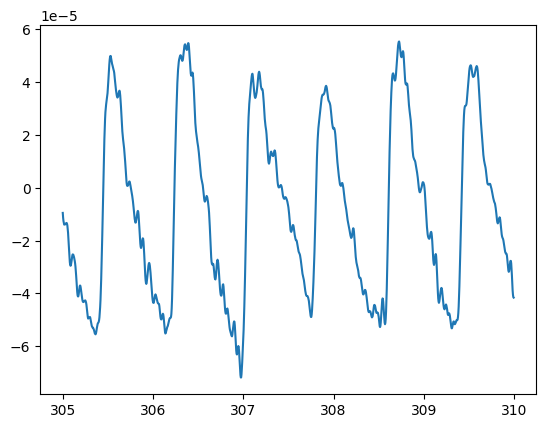

In [29]:
path_edf_subject = os.path.join(path_edf, list_subject_id[0])


_edf = mne.io.read_raw_edf(path_edf_subject, preload=False, verbose=False, include=['Pleth'])


data, times = _edf[:]
data = -data[0]

idx = range(305*256, 310*256)
plt.plot(times[idx], data[idx])

In [33]:
os.path.basename(path_edf_subject).split('.')[0]

'mesa-sleep-0001'

In [37]:
def load_edf_and_extract_data(path_edf_subject):
    _edf = mne.io.read_raw_edf(path_edf_subject, preload=False, verbose=False, include=['Pleth'])

    data, times = _edf[:]
    data = -data[0]

    fname = os.path.basename(path_edf_subject).split('.')[0]
    with h5py.File("Y:/MESA_0.7.0/ppg/%s.h5" % fname, "w") as hdf:
        hdf.create_dataset("data", data=data)

load_edf_and_extract_data(path_edf_subject)

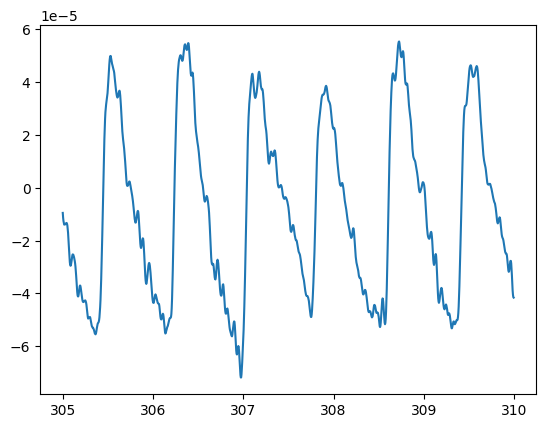

In [40]:
with h5py.File("Y:/MESA_0.7.0/ppg/mesa-sleep-0001.h5") as hdf:
    loaded_data = hdf["data"][:]

idx = range(305*256, 310*256)
plt.plot(times[idx], loaded_data[idx])